# Imports

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show sklearn

Name: sklearn
Version: 0.0.post1
Summary: deprecated sklearn package, use scikit-learn instead
Home-page: UNKNOWN
Author: 
Author-email: 
License: UNKNOWN
Location: /Users/divijkharche/opt/anaconda3/lib/python3.9/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip list

Package                                           Version
------------------------------------------------- --------------------
absl-py                                           1.0.0
alabaster                                         0.7.12
anaconda-client                                   1.9.0
anaconda-navigator                                2.1.1
anaconda-project                                  0.10.1
anyio                                             2.2.0
appdirs                                           1.4.4
applaunchservices                                 0.2.1
appnope                                           0.1.2
appscript                                         1.1.2
argh                                              0.26.2
argon2-cffi                                       20.1.0
arrow                                             0.13.1
asn1crypto                                        1.4.0
astroid                                           2.6.6
astropy                   

yapf                                              0.31.0
ydata-profiling                                   4.0.0
zict                                              2.0.0
zipp                                              3.6.0
zope.event                                        4.5.0
zope.interface                                    5.4.0
Note: you may need to restart the kernel to use updated packages.


In [5]:

import pandas as pd
import numpy as np
from numpy import isnan
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype


#  Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
# from xgboost import XGBClassifier
# import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer



# Data Gathering

In [6]:
df = pd.read_csv("stroke.csv")  #,na_values='Unknown')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [7]:
smokers_grouped = df.groupby("smoking_status")["id"].count()
smokers_grouped.head(10)

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: id, dtype: int64

In [8]:
work_type_grouped = df.groupby("work_type")["id"].count()
work_type_grouped.head(10)

work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
Name: id, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Clean up

In [10]:
# Delete 1 "other" gender
df = df.loc[df["gender"] != "Other"]

df.shape

(5109, 12)

In [11]:
# impute Nulls with mean/mode  
df.fillna(df.bmi.mean(), inplace=True)


/Users/divijkharche/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
    # Substitute 1/0 for yes / no and rural / urban 

df["Sex_Label"] = [1 if x == "Male" else 0 for x in df.gender] #label encoding
df.drop("gender", axis=1, inplace=True)

df["Married_Label"] = [1 if x == "Yes" else 0 for x in df.ever_married] #label encoding
df.drop("ever_married", axis=1, inplace=True)

df["Residence_Label"] = [1 if x == "Rural" else 0 for x in df.Residence_type] #label encoding
df.drop("Residence_type", axis=1, inplace=True)
 

/var/folders/9f/v13h_6_j671f4bhtc89d17sh0000gn/T/ipykernel_20845/1184078423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex_Label"] = [1 if x == "Male" else 0 for x in df.gender] #label encoding
/Users/divijkharche/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/9f/v13h_6_j671f4bhtc89d17sh0000gn/T/ipykernel_20845/1184078423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [13]:
df

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Sex_Label,Married_Label,Residence_Label
0,9046,67.0,0,1,Private,228.69,36.60000,formerly smoked,1,1,1,0
1,51676,61.0,0,0,Self-employed,202.21,28.89456,never smoked,1,0,1,1
2,31112,80.0,0,1,Private,105.92,32.50000,never smoked,1,1,1,1
3,60182,49.0,0,0,Private,171.23,34.40000,smokes,1,0,1,0
4,1665,79.0,1,0,Self-employed,174.12,24.00000,never smoked,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,83.75,28.89456,never smoked,0,0,1,0
5106,44873,81.0,0,0,Self-employed,125.20,40.00000,never smoked,0,0,1,0
5107,19723,35.0,0,0,Self-employed,82.99,30.60000,never smoked,0,0,1,1
5108,37544,51.0,0,0,Private,166.29,25.60000,formerly smoked,0,1,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   work_type          5109 non-null   object 
 5   avg_glucose_level  5109 non-null   float64
 6   bmi                5109 non-null   float64
 7   smoking_status     5109 non-null   object 
 8   stroke             5109 non-null   int64  
 9   Sex_Label          5109 non-null   int64  
 10  Married_Label      5109 non-null   int64  
 11  Residence_Label    5109 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 518.9+ KB


## One Hot Encoding

In [15]:
#Split out work_type and smoking_status using get dummies
linear_dums = pd.get_dummies(df[["work_type", "smoking_status"]], drop_first=False) #linear models don't need the extra column
tree_dums = pd.get_dummies(df[["work_type", "smoking_status"]], drop_first=False)

In [16]:
tree_dums

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,0,0,1,0
5106,0,0,0,1,0,0,0,1,0
5107,0,0,0,1,0,0,0,1,0
5108,0,0,1,0,0,0,1,0,0


In [17]:
linear_dums

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,0,0,0,1,0
5106,0,0,0,1,0,0,0,1,0
5107,0,0,0,1,0,0,0,1,0
5108,0,0,1,0,0,0,1,0,0


In [18]:
# Combine back into the training set
df_train_linear = pd.concat([df[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke", "Sex_Label","Married_Label","Residence_Label"]], linear_dums], axis=1)
df_train_tree = pd.concat([df[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke", "Sex_Label","Married_Label","Residence_Label"]], tree_dums], axis=1)


## Flask Processing - Compliant and Consistant Field Naming

In [19]:
# Rename fields with bad syntax
df_train_linear = df_train_linear.rename({'work_type_Self-employed': 'work_type_self_employed', 
                                          'smoking_status_formerly smoked': 'smoking_status_formerly_smoked', 
                                          'smoking_status_never smoked':'smoking_status_never_smoked'}, axis=1)

df_train_tree = df_train_tree.rename({'work_type_Self-employed': 'work_type_self_employed', 
                                      'smoking_status_formerly smoked': 'smoking_status_formerly_smoked', 
                                      'smoking_status_never smoked':'smoking_status_never_smoked'}, axis=1)


In [20]:
df_train_linear

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex_Label,Married_Label,Residence_Label,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,1,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.89456,1,0,1,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,0,1,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,0,1,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,40.00000,0,0,1,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.60000,0,0,1,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.60000,0,1,1,1,0,0,1,0,0,0,1,0,0


In [21]:
df_train_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   Sex_Label                       5109 non-null   int64  
 7   Married_Label                   5109 non-null   int64  
 8   Residence_Label                 5109 non-null   int64  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_self_employed         51

In [22]:
df_train_linear

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex_Label,Married_Label,Residence_Label,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,1,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.89456,1,0,1,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,0,1,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,0,1,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,40.00000,0,0,1,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.60000,0,0,1,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.60000,0,1,1,1,0,0,1,0,0,0,1,0,0


In [23]:
df_train_tree

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex_Label,Married_Label,Residence_Label,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,1,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.89456,1,0,1,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,0,1,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.89456,0,0,1,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,40.00000,0,0,1,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.60000,0,0,1,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.60000,0,1,1,1,0,0,1,0,0,0,1,0,0


In [24]:
df_train_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   avg_glucose_level               5109 non-null   float64
 4   bmi                             5109 non-null   float64
 5   stroke                          5109 non-null   int64  
 6   Sex_Label                       5109 non-null   int64  
 7   Married_Label                   5109 non-null   int64  
 8   Residence_Label                 5109 non-null   int64  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_self_employed         51

## Data Cleanup / Scaling


In [25]:
#x_scaler = MinMaxScaler()


In [26]:
#features = df
#x_scaler.fit(features)

# Data Exploration

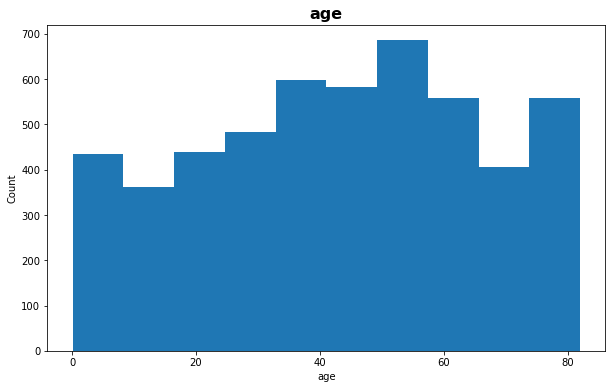

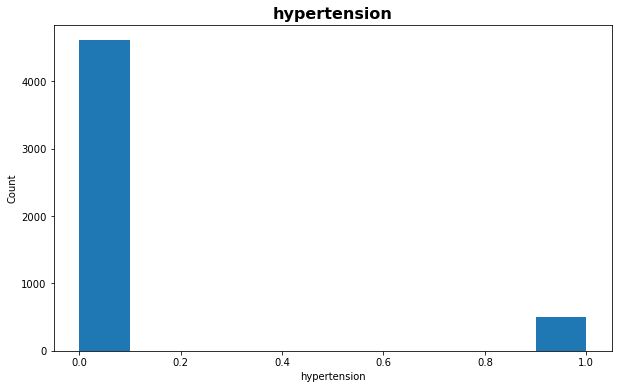

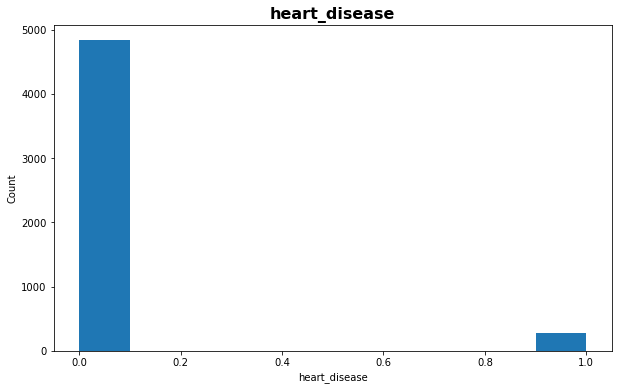

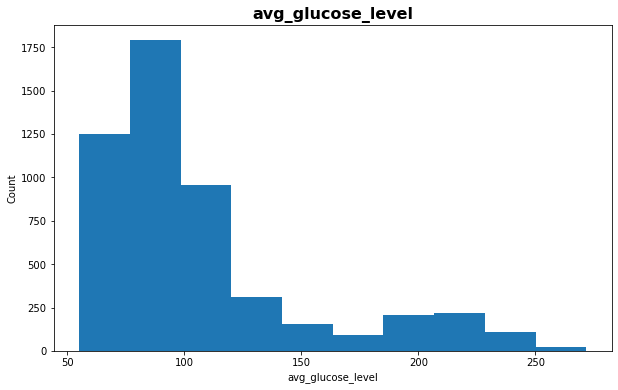

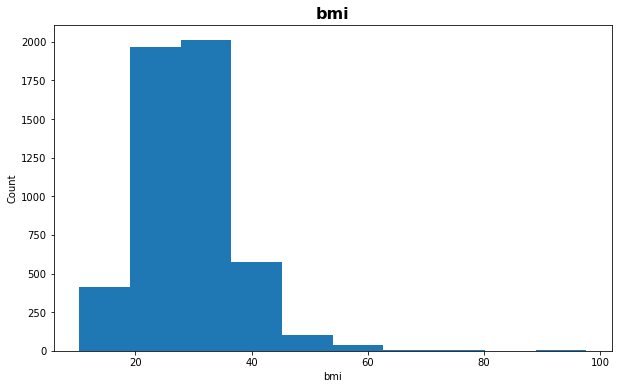

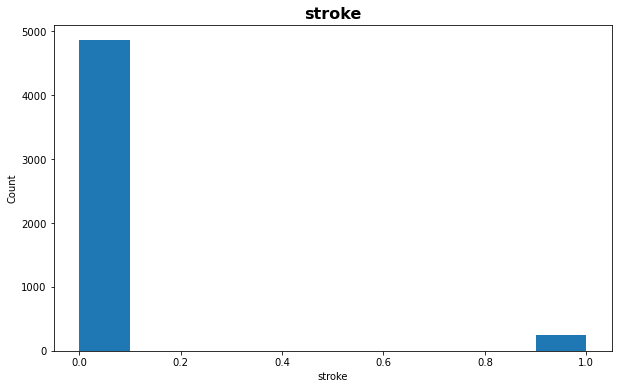

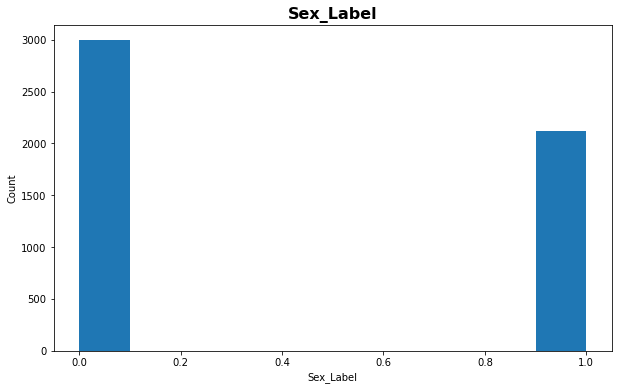

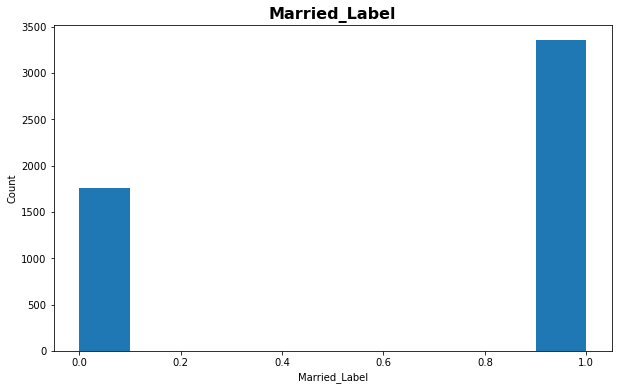

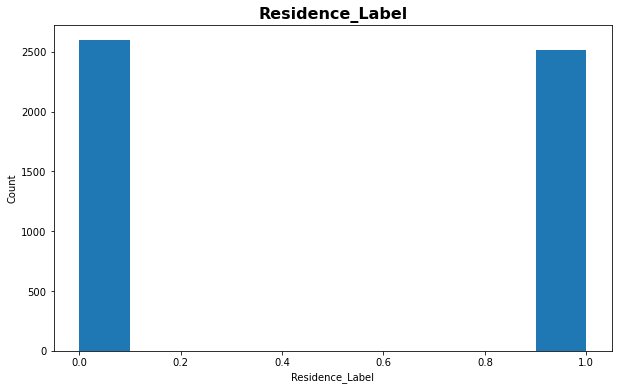

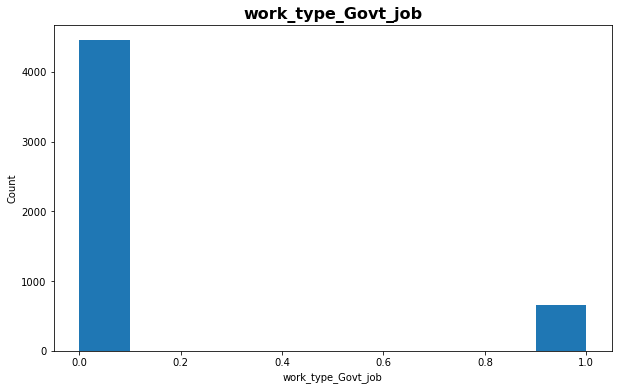

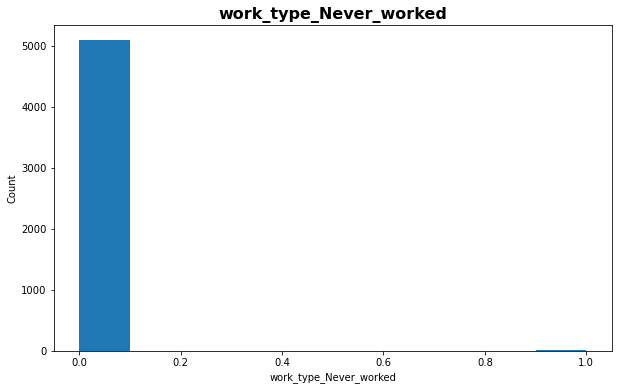

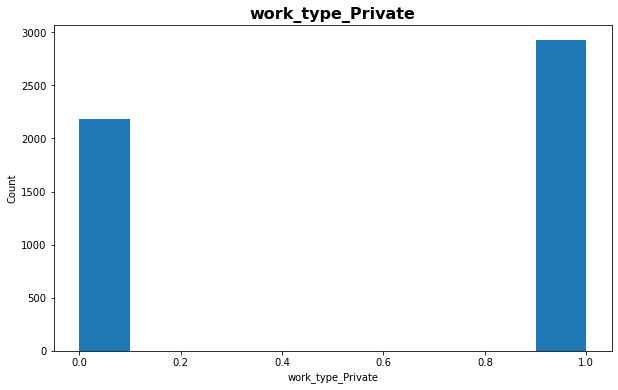

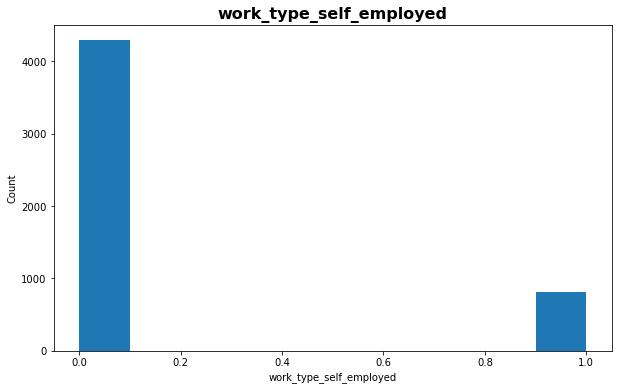

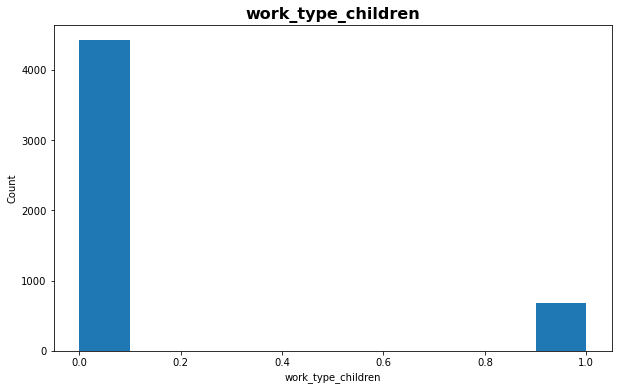

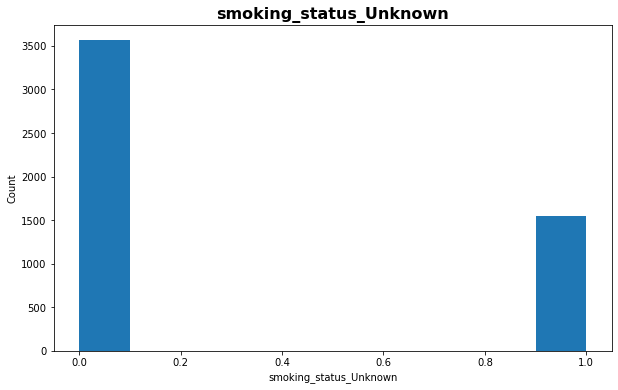

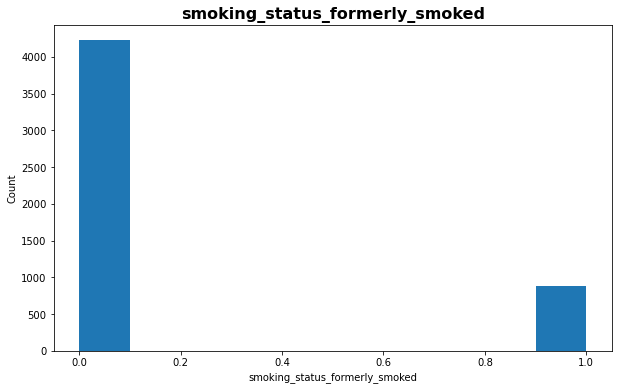

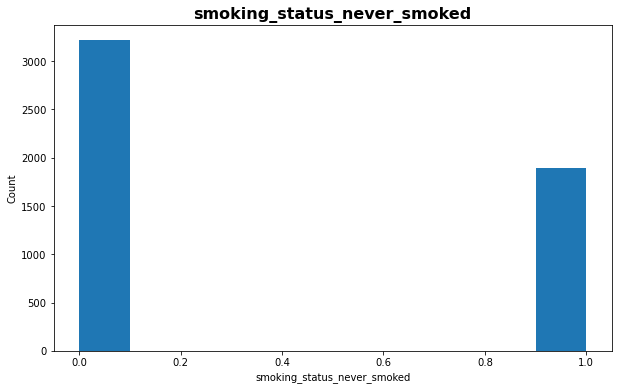

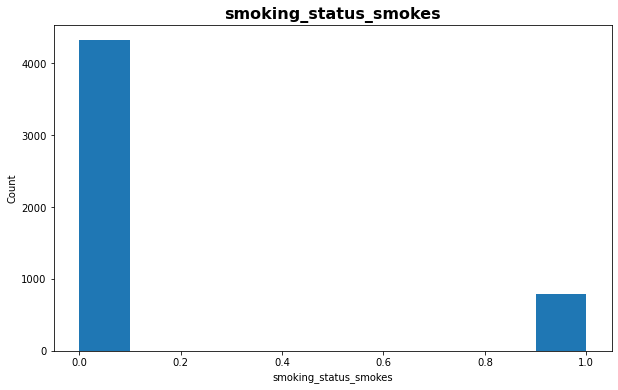

In [27]:
# Plot distributions
for col in df_train_tree.columns:
    
    plt.figure(figsize=(10,6))
    plt.hist(df_train_tree[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

In [28]:
# Column List (use for resorting by correlation)

df_train_tree.columns.tolist()

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'Sex_Label',
 'Married_Label',
 'Residence_Label',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_self_employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly_smoked',
 'smoking_status_never_smoked',
 'smoking_status_smokes']

In [29]:
#Resort Columns
df_train_tree =  df_train_tree[[
 'stroke',  
 'age',
 'heart_disease',
 'avg_glucose_level', 
 'hypertension', 
 'Married_Label', 
 'smoking_status_formerly_smoked',   
 'work_type_self_employed', 
 'bmi',
 'work_type_Private',    
 'Sex_Label', 
 'smoking_status_smokes',   
 'work_type_Govt_job', 
 'smoking_status_never_smoked',   
 'work_type_Never_worked',    
 'Residence_Label',  
 'smoking_status_Unknown',   
 'work_type_children' 
 ]]

## Correlations

In [30]:
df_train_tree.corr()

,stroke,age,heart_disease,avg_glucose_level,hypertension,Married_Label,smoking_status_formerly_smoked,work_type_self_employed,bmi,work_type_Private,Sex_Label,smoking_status_smokes,work_type_Govt_job,smoking_status_never_smoked,work_type_Never_worked,Residence_Label,smoking_status_Unknown,work_type_children
stroke,1.000000,0.245239,0.134905,0.131991,0.127891,0.108299,0.064683,0.062150,0.038917,0.011927,0.009081,0.008920,0.002660,-0.004163,-0.014885,-0.015415,-0.055924,-0.083888
age,0.245239,1.000000,0.263777,0.238323,0.276367,0.679084,0.237347,0.327949,0.325861,0.116678,-0.027752,0.073075,0.129965,0.119207,-0.078667,-0.014031,-0.378366,-0.634320
heart_disease,0.134905,0.263777,1.000000,0.161907,0.108292,0.114601,0.066938,0.086742,0.038865,0.000068,0.085685,0.044030,0.001312,-0.021893,-0.015715,-0.003045,-0.066765,-0.091654
avg_glucose_level,0.131991,0.238323,0.161907,1.000000,0.174540,0.155329,0.067796,0.062770,0.168913,0.016451,0.054722,0.017716,0.013908,0.024011,-0.014665,0.004783,-0.095035,-0.102195
hypertension,0.127891,0.276367,0.108292,0.174540,1.000000,0.164187,0.059022,0.115417,0.160151,-0.005358,0.021223,0.031213,0.017661,0.065018,-0.021612,0.007980,-0.141551,-0.129535
Married_Label,0.108299,0.679084,0.114601,0.155329,0.164187,1.000000,0.171960,0.192637,0.335564,0.154104,-0.030171,0.105132,0.133964,0.102663,-0.090873,-0.005988,-0.332335,-0.544658
smoking_status_formerly_smoked,0.064683,0.237347,0.066938,0.067796,0.059022,0.171960,1.000000,0.093492,0.104675,0.025170,0.043121,-0.195483,0.029865,-0.350790,-0.030081,-0.008093,-0.301028,-0.160577
work_type_self_employed,0.062150,0.327949,0.086742,0.062770,0.115417,0.192637,0.093492,1.000000,0.070757,-0.505448,-0.026045,-0.003663,-0.167849,0.030605,-0.028734,-0.010508,-0.106313,-0.172219
bmi,0.038917,0.325861,0.038865,0.168913,0.160151,0.335564,0.104675,0.070757,1.000000,0.204055,-0.025605,0.085518,0.077885,0.106105,-0.028613,0.000288,-0.265094,-0.442946
work_type_Private,0.011927,0.116678,0.000068,0.016451,-0.005358,0.154104,0.025170,-0.505448,0.204055,1.000000,-0.032502,0.100107,-0.444394,0.105003,-0.076075,0.018005,-0.209926,-0.455965


## Correlation Heatmap

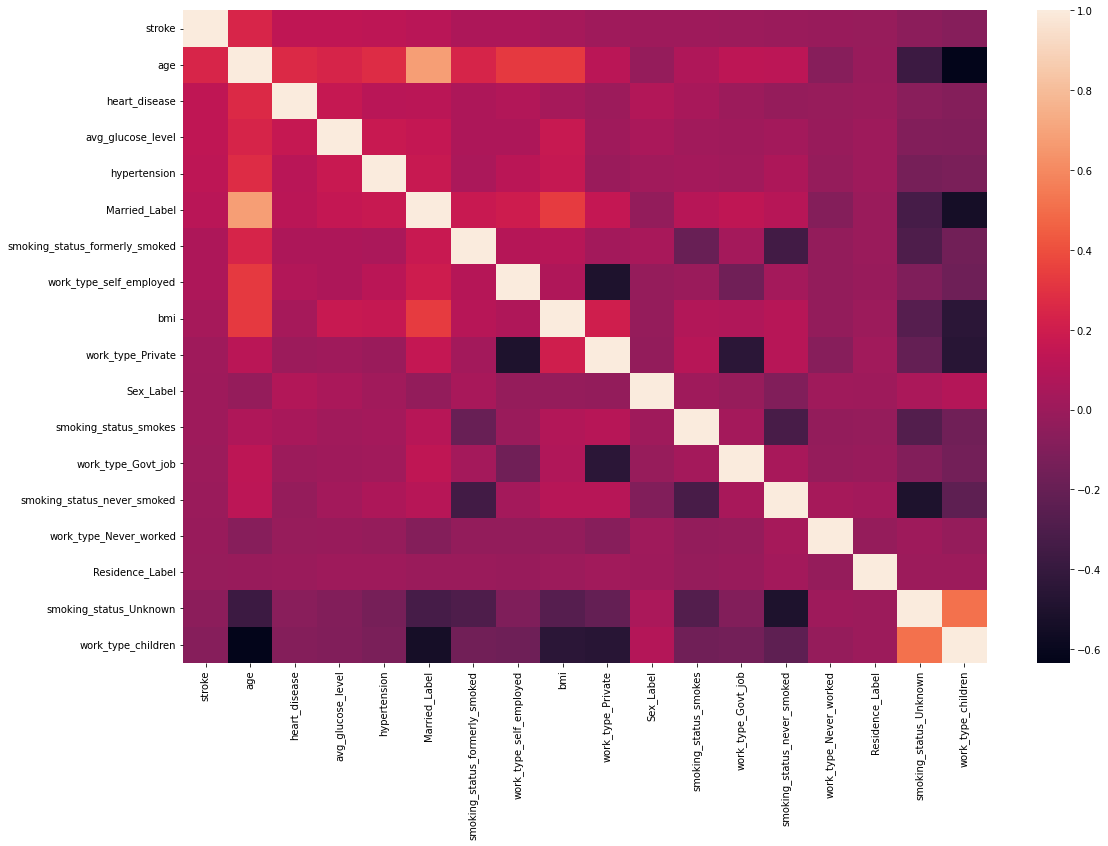

In [31]:
plt.figure(figsize=(18,12))
sns.heatmap(df_train_tree.corr())
plt.show()

## Library to fix imbalance in data set

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek,SMOTEENN

#Use counter from collections in features modeling
from collections import Counter

## Features and Identifying Stroke as an Imbalanced Class

Before Counter({0: 3888, 1: 199})


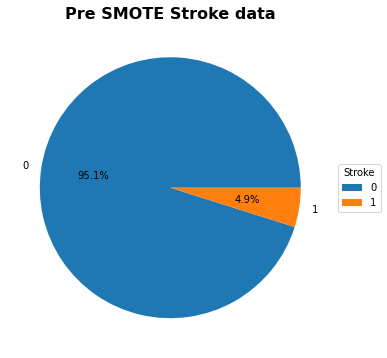

In [33]:
############ features##################
features = df_train_tree.drop('stroke',axis=1)
target = df_train_tree["stroke"]
X = features.to_numpy()
y = target.to_numpy()
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = \
train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)
counter=Counter(y_train)
print('Before',counter)

# pie chart showing disbalnce 
##############################################
plt.figure(figsize=(10,6))
plt.pie(pd.Series(counter),autopct='%1.1f%%', 
        labels=pd.Series(counter).index)
plt.title('Pre SMOTE Stroke data', fontsize=16, fontweight="bold")
plt.legend(pd.Series(counter).index,
          title="Stroke",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Synthesizing to Handle Imbalanced Class

In [34]:
#set SMOTE (Synthetic Minority Over-sampling Technique)
smt=SMOTE(random_state=42)

After Counter({0: 3888, 1: 3888})


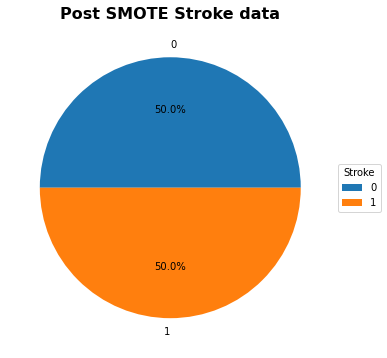

In [35]:
X_train, y_train = smt.fit_resample(X_train, y_train)

counter=Counter(y_train)
print('After',counter)

# pie chart 
plt.figure(figsize=(10,6))
plt.pie(pd.Series(counter),autopct='%1.1f%%', 
        labels=pd.Series(counter).index)
plt.title('Post SMOTE Stroke data', fontsize=16, fontweight="bold")
plt.legend(pd.Series(counter).index,
          title="Stroke",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Machine Learning

In [36]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split

## Linear Models First

In [38]:
features = df_train_linear.drop("stroke", axis=1)
target = df_train_linear.stroke

In [39]:
# Exclude because of Features Section Above
#X = features.to_numpy()
#y = target.to_numpy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
# initialize
log = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)

# fit
log = log.fit(X_train, y_train)

# predictions
in_preds = log.predict(X_train)
out_preds = log.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(log, X_train, y_train)
# plt.title("In Sample ROC Curve")
# # plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(log, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,out_preds)


Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3888
           1       0.76      0.85      0.80      3888

    accuracy                           0.79      7776
   macro avg       0.80      0.79      0.79      7776
weighted avg       0.80      0.79      0.79      7776

In Sample Confusion Matrix: 
[[2860 1028]
 [ 580 3308]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.73      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.94      0.73      0.81      1022

Out Sample Confusion Matrix: 
[[711 261]
 [ 10  40]]


0.7348336594911937

In [47]:
# initialize
knn = KNeighborsClassifier(n_neighbors=20)

# fit
knn = knn.fit(X_train, y_train)

# predictions
in_preds = knn.predict(X_train)
out_preds = knn.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(knn, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(knn, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,out_preds)

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3888
           1       0.82      0.96      0.88      3888

    accuracy                           0.88      7776
   macro avg       0.89      0.88      0.87      7776
weighted avg       0.89      0.88      0.87      7776

In Sample Confusion Matrix: 
[[3073  815]
 [ 156 3732]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       972
           1       0.09      0.48      0.16        50

    accuracy                           0.75      1022
   macro avg       0.53      0.62      0.51      1022
weighted avg       0.92      0.75      0.82      1022

Out Sample Confusion Matrix: 
[[743 229]
 [ 26  24]]


0.7504892367906066

In [48]:
# initialize
svm = SVC(class_weight='balanced')

# fit
svm = svm.fit(X_train, y_train)

# predictions
in_preds = svm.predict(X_train)
out_preds = svm.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(svm, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(svm, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

accuracy_score(y_test,out_preds)


Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3888
           1       0.83      0.94      0.88      3888

    accuracy                           0.88      7776
   macro avg       0.88      0.88      0.88      7776
weighted avg       0.88      0.88      0.88      7776

In Sample Confusion Matrix: 
[[3146  742]
 [ 216 3672]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.12      0.54      0.19        50

    accuracy                           0.78      1022
   macro avg       0.55      0.67      0.53      1022
weighted avg       0.93      0.78      0.84      1022

Out Sample Confusion Matrix: 
[[772 200]
 [ 23  27]]


0.7818003913894325

## Trees

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier


In [54]:
features = df_train_tree.drop("stroke", axis=1)
target = df_train_tree.stroke

In [55]:
# Exclude because of Features Section Above
# X = features.to_numpy()
# y = target.to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
# initialize
dt = DecisionTreeClassifier()

# fit
dt = dt.fit(X_train, y_train)

# predictions
in_preds = dt.predict(X_train)
out_preds = dt.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(dt, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(dt, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()
accuracy_score(y_test,out_preds)

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      1.00      1.00      3888

    accuracy                           1.00      7776
   macro avg       1.00      1.00      1.00      7776
weighted avg       1.00      1.00      1.00      7776

In Sample Confusion Matrix: 
[[3888    0]
 [   0 3888]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.10      0.20      0.13        50

    accuracy                           0.87      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.91      0.87      0.89      1022

Out Sample Confusion Matrix: 
[[883  89]
 [ 40  10]]


0.8737769080234834

In [57]:
# initialize
rf = RandomForestClassifier()

# fit
rf = rf.fit(X_train, y_train)

# predictions
in_preds = rf.predict(X_train)
out_preds = rf.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(rf, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(rf, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()
accuracy_score(y_test,out_preds)

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      1.00      1.00      3888

    accuracy                           1.00      7776
   macro avg       1.00      1.00      1.00      7776
weighted avg       1.00      1.00      1.00      7776

In Sample Confusion Matrix: 
[[3888    0]
 [   0 3888]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.15      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.91      1022

Out Sample Confusion Matrix: 
[[919  53]
 [ 41   9]]


0.9080234833659491

In [58]:
# initialize
ada = AdaBoostClassifier(random_state=42,n_estimators= 1000)

# fit
ada = ada.fit(X_train, y_train)

# predictions
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(ada, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(ada, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()
accuracy_score(y_test,out_preds)

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3888
           1       0.94      0.93      0.94      3888

    accuracy                           0.94      7776
   macro avg       0.94      0.94      0.94      7776
weighted avg       0.94      0.94      0.94      7776

In Sample Confusion Matrix: 
[[3639  249]
 [ 253 3635]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.20      0.30      0.24        50

    accuracy                           0.91      1022
   macro avg       0.58      0.62      0.60      1022
weighted avg       0.93      0.91      0.92      1022

Out Sample Confusion Matrix: 
[[912  60]
 [ 35  15]]


0.9070450097847358

In [60]:
# initialize
gb = GradientBoostingClassifier(random_state=42,n_estimators= 1000)

# fit
gb = gb.fit(X_train, y_train)

# predictions
in_preds = gb.predict(X_train)
out_preds = gb.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(gb, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(gb, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()
accuracy_score(y_test,out_preds)

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3888
           1       1.00      0.99      0.99      3888

    accuracy                           0.99      7776
   macro avg       0.99      0.99      0.99      7776
weighted avg       0.99      0.99      0.99      7776

In Sample Confusion Matrix: 
[[3886    2]
 [  51 3837]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.36      0.20      0.26        50

    accuracy                           0.94      1022
   macro avg       0.66      0.59      0.61      1022
weighted avg       0.93      0.94      0.94      1022

Out Sample Confusion Matrix: 
[[954  18]
 [ 40  10]]


0.9432485322896281

# Model Selection

In [50]:
# We choose xgboost because of the high accuracy and F1 score in the stroke data analysis

In [62]:
#initialize
log_final = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)



# fit
log_final.fit(X, y)

# predict
in_preds = log_final.predict(X)

#evaluate
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y, in_preds)}")
print()




Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      4860
           1       0.14      0.82      0.24       249

    accuracy                           0.74      5109
   macro avg       0.56      0.78      0.54      5109
weighted avg       0.95      0.74      0.81      5109

In Sample Confusion Matrix: 
[[3581 1279]
 [  45  204]]



0.7408494813074966

In [52]:

import pickle
  
# Save the trained model as a pickle string.
pickle.dump(log, open('log1.pkl','wb'))
# saved_model = pickle.dumps(log)
  
# Load the pickled model
# log_from_pickle = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# log_from_pickle.predict(X_test)

In [53]:
import pickle
  
# Save the trained model as a pickle string.
saved_model1 = pickle.dumps(knn)
  
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model1)
  
# Use the loaded pickled model to make predictions
knn_from_pickle.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
import pickle
  
# Save the trained model as a pickle string.
saved_model2 = pickle.dumps(svm)
  
# Load the pickled model
svm_from_pickle = pickle.loads(saved_model2)
  
# Use the loaded pickled model to make predictions
svm_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
import pickle
  
# Save the trained model as a pickle string.
saved_model3 = pickle.dumps(rf)
  
# Load the pickled model
rf_from_pickle = pickle.loads(saved_model3)
  
# Use the loaded pickled model to make predictions
rf_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
import pickle
  
# Save the trained model as a pickle string.
pickle.dump(gb, open('gb.pkl','wb'))